In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
dt_clf = DecisionTreeClassifier(random_state=156)
iris = load_iris()
X_train,X_text,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=11)

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

In [8]:
export_graphviz(dt_clf,
                out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

In [9]:
import graphviz

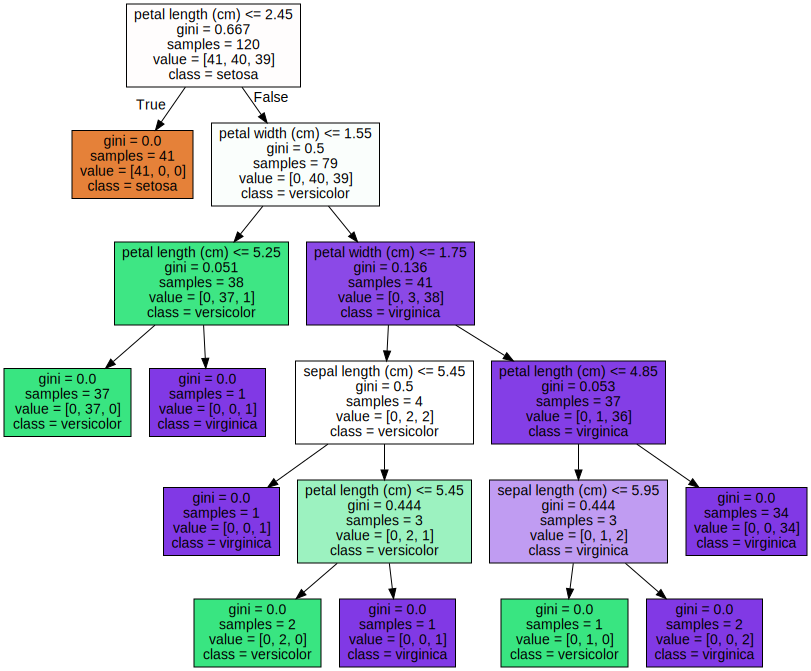

In [10]:
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

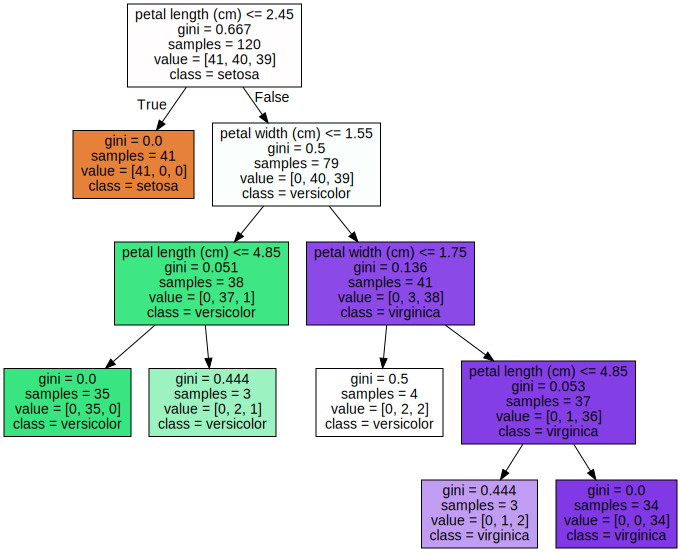

In [19]:
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=3)
dt_clf.fit(X_train,y_train)
export_graphviz(dt_clf,
                out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [20]:
dt_clf.feature_importances_

array([0.        , 0.        , 0.55387887, 0.44612113])

In [21]:
import numpy as np
np.round(dt_clf.feature_importances_,3)

array([0.   , 0.   , 0.554, 0.446])

In [32]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

In [33]:
X,y =  make_classification(n_features=2,n_redundant=0,n_classes=3,n_clusters_per_class=1,random_state=0)

In [34]:
X[:2]

array([[ 0.12041909, -1.68941375],
       [ 1.09665605,  1.79445113]])

In [35]:
y

array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0])

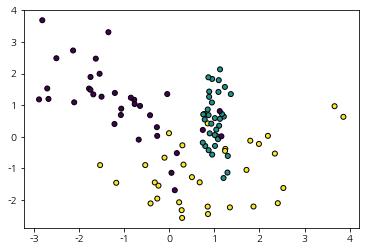

In [36]:
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=25,edgecolor='k')
matplotlib.rcParams['axes.unicode_minus']=False

In [40]:

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           #cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

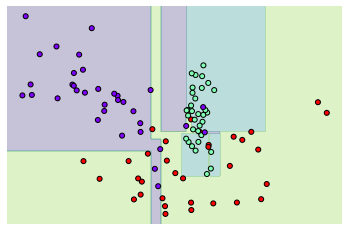

In [41]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(X,y)

visualize_boundary(dt_clf,X,y)

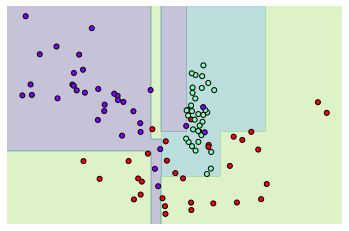

In [46]:
dt_clf = DecisionTreeClassifier(random_state=156,max_depth=4).fit(X,y)

visualize_boundary(dt_clf,X,y)